**Estimating Probabilities**

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

Logistic Regression model estimated probability (vectorized form):

$$\hat{p} = h_{\theta}(x) = \sigma(x^{T}\theta)$$

The logistic - noted $\sigma(\cdot)$ is a *sigmoid function* (i.e., S-shaped) that outputs numbers between 0 and 1. It is defined as:

$$\sigma(t) = \frac{1}{1 + exp(-t)} = \frac{1}{1+e^{-t}}$$


In [46]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

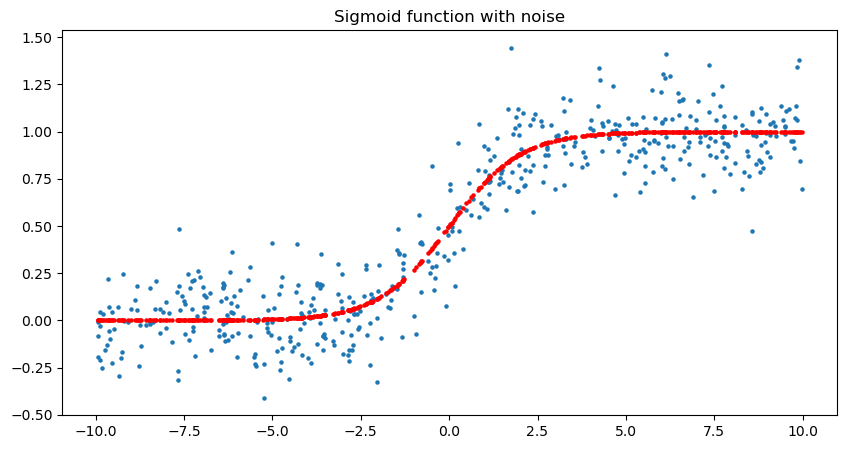

In [47]:
# create a set of X of 500 points chosen randomly between +/- 10
X = np.random.uniform(-10, 10, 500)


# create a set of Y of 500 points chosen randomly between +/- 10 use sigmoid function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

Y = sigmoid(X)

# create a set of Y of 500 points chosen randomly between +/- 10 use sigmoid function and add gaussian noise with variance of 0.15
noise = np.random.normal(0, 0.15, 500)

# add the vector of noise to the vector of Y
Y_noise = Y + noise

def plot_sigmoid(X, Y, Y_noise, title=None, scatter_width=5):
    plt.figure(figsize=(10, 5))
    plt.scatter(X, Y_noise, s=scatter_width)
    plt.scatter(X, Y, color='red', s=scatter_width)
    plt.title(title)
    plt.show()

plot_sigmoid(X, Y, Y_noise, title='Sigmoid function with noise')

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [49]:
# First reshape X if it's 1D
X = X.reshape(-1, 1)

# Your existing train/test split and model training code
x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(X, Y, test_size=0.2)
x_train_noisy, x_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X, Y_noise, test_size=0.2)

clean_model = LinearRegression()
noisy_model = LinearRegression()

clean_model.fit(x_train_clean, y_train_clean)
noisy_model.fit(x_train_noisy, y_train_noisy)

# Make predictions
clean_predictions = clean_model.predict(x_test_clean)
noisy_predictions = noisy_model.predict(x_test_noisy)

# Calculate RMSE
clean_rmse = np.round(np.sqrt(mean_squared_error(y_test_clean, clean_predictions)), 4)
noisy_rmse = np.round(np.sqrt(mean_squared_error(y_test_noisy, noisy_predictions)), 4)

print(f'Clean RMSE: {clean_rmse}, Noisy RMSE: {noisy_rmse}')

# If you want training RMSE as well:
clean_train_predictions = clean_model.predict(x_train_clean)
noisy_train_predictions = noisy_model.predict(x_train_noisy)

clean_train_rmse = np.round(np.sqrt(mean_squared_error(y_train_clean, clean_train_predictions)), 4)
noisy_train_rmse = np.round(np.sqrt(mean_squared_error(y_train_noisy, noisy_train_predictions)), 4)

print(f'Clean Training RMSE: {clean_train_rmse}, Noisy Training RMSE: {noisy_train_rmse}')

Clean RMSE: 0.1566, Noisy RMSE: 0.2249
Clean Training RMSE: 0.1572, Noisy Training RMSE: 0.2282


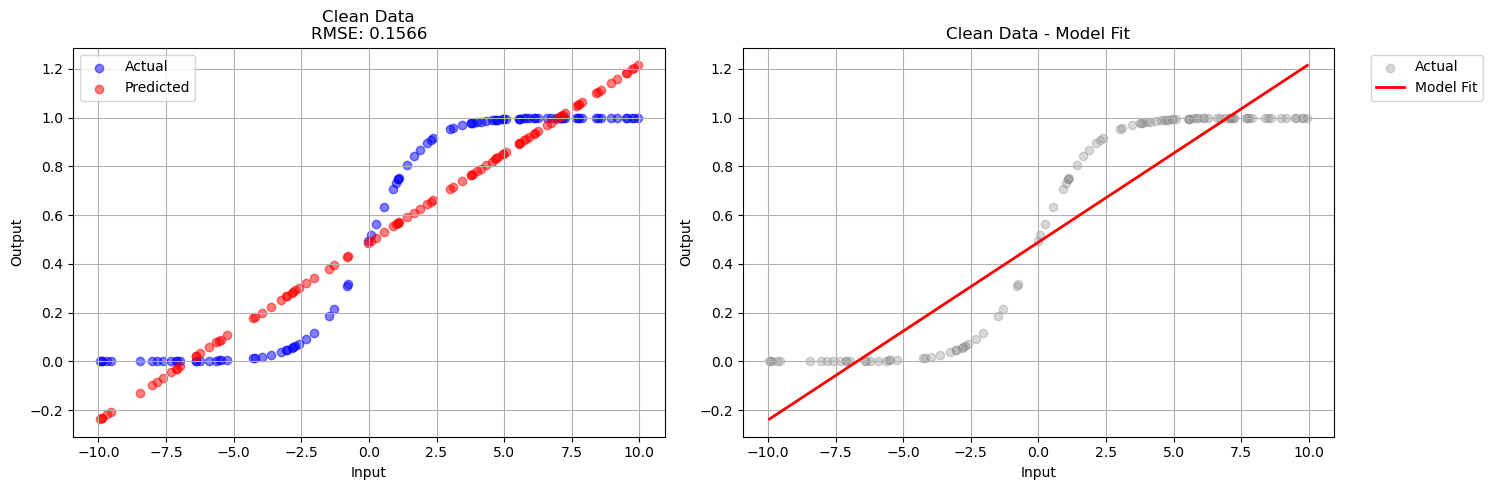

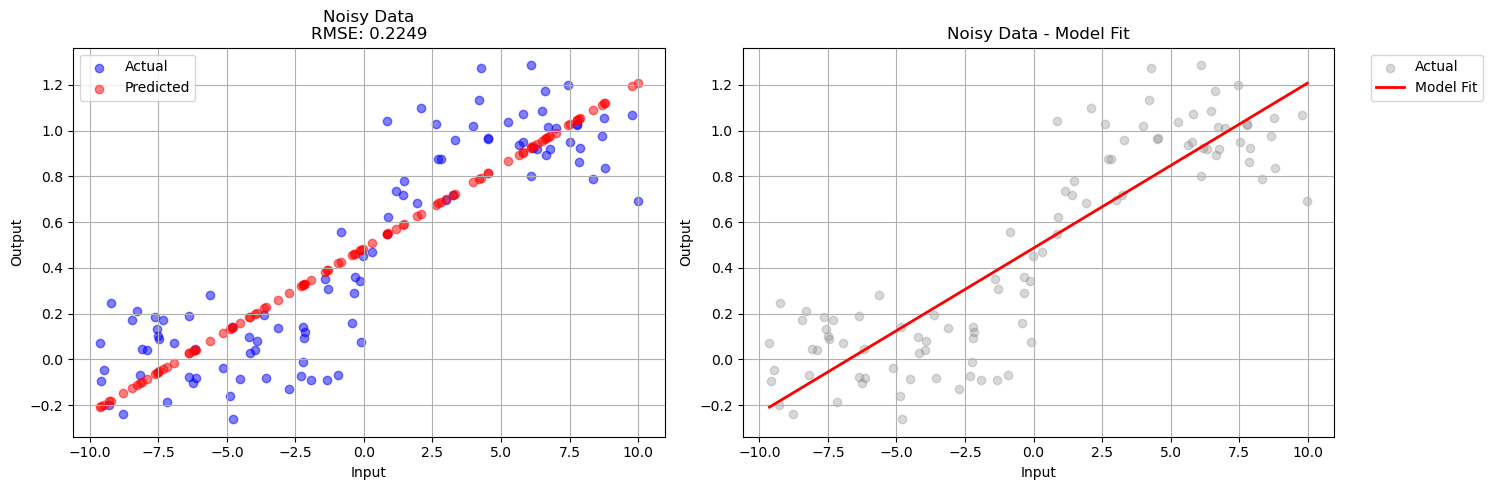

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model(x_test, y_test, predictions, rmse, title=None):
    # Create figure with improved size ratio
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # First subplot: Scatter plot
    ax1.scatter(x_test, y_test, color='blue', alpha=0.5, label='Actual')
    ax1.scatter(x_test, predictions, color='red', alpha=0.5, label='Predicted')
    ax1.set_xlabel('Input')
    ax1.set_ylabel('Output')
    ax1.set_title(f"{title}\nRMSE: {rmse:.4f}")
    ax1.legend()
    ax1.grid(True)
    
    # Second subplot: Regression line
    sorted_indices = np.argsort(x_test.flatten())
    ax2.scatter(x_test, y_test, color='gray', alpha=0.3, label='Actual')
    ax2.plot(x_test[sorted_indices], predictions[sorted_indices], 
             color='red', label='Model Fit', linewidth=2)
    ax2.set_xlabel('Input')
    ax2.set_ylabel('Output')
    ax2.set_title(f"{title} - Model Fit")
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_model(x_test_clean, y_test_clean, clean_predictions, clean_rmse, title='Clean Data')
plot_model(x_test_noisy, y_test_noisy, noisy_predictions, noisy_rmse, title='Noisy Data')


In [51]:

def create_polynomial_models(X, y, degrees=[3, 4, 5, 6, 7], test_size=0.2, random_state=42):
    """
    Create and evaluate polynomial models of different degrees without regularization
    """
    results = {}
    X = X.reshape(-1, 1)  # Ensure X is 2D
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Make predictions
        train_pred = model.predict(X_train_poly)
        test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        results[degree] = {
            'model': model,
            'poly': poly,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'train_pred': train_pred,
            'test_pred': test_pred
        }
        
    return results

In [52]:
def create_regularized_polynomial_models(X, y, degrees=[3, 4, 5, 6, 7], test_size=0.2, random_state=42):
    """
    Create and evaluate polynomial models with Ridge regularization
    """
    results = {}
    X = X.reshape(-1, 1)  # Ensure X is 2D
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Fit model with regularization
        model = Ridge()
        model.fit(X_train_poly, y_train)
        
        # Make predictions
        train_pred = model.predict(X_train_poly)
        test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        results[degree] = {
            'model': model,
            'poly': poly,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'train_pred': train_pred,
            'test_pred': test_pred
        }
    
    return results

In [53]:
def plot_model_results(results, title_prefix="Model Results", model_type="poly"):
    param_values = list(results.keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot RMSE comparison
    train_rmse = [results[p]['train_rmse'] for p in param_values]
    test_rmse = [results[p]['test_rmse'] for p in param_values]
    
    ax1.plot(param_values, train_rmse, 'bo-', label='Training RMSE')
    ax1.plot(param_values, test_rmse, 'ro-', label='Test RMSE')
    param_name = 'Polynomial Degree' if model_type == 'poly' else 'Degree' if model_type == 'svr' else 'Max Depth'
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('RMSE')
    ax1.set_title(f'{title_prefix} - RMSE vs {param_name}')
    ax1.legend()
    ax1.grid(True)
    
    # Plot fitted curves for each parameter value
    colors = plt.cm.rainbow(np.linspace(0, 1, len(param_values)))
    
    for param, color in zip(param_values, colors):
        result = results[param]
        X_test = result['X_test']
        X_test_sorted = np.sort(X_test, axis=0)
        
        if model_type == 'poly':
            X_test_sorted_transformed = result['poly'].transform(X_test_sorted)
            y_pred = result['model'].predict(X_test_sorted_transformed)
        else:
            y_pred = result['model'].predict(X_test_sorted)
        
        ax2.scatter(X_test, result['y_test'], color='gray', alpha=0.3)
        ax2.plot(X_test_sorted, y_pred, color=color, 
                label=f'{param_name}={param} (RMSE: {result["test_rmse"]:.4f})')
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('y')
    ax2.set_title(f'{title_prefix} - Fitted Models')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

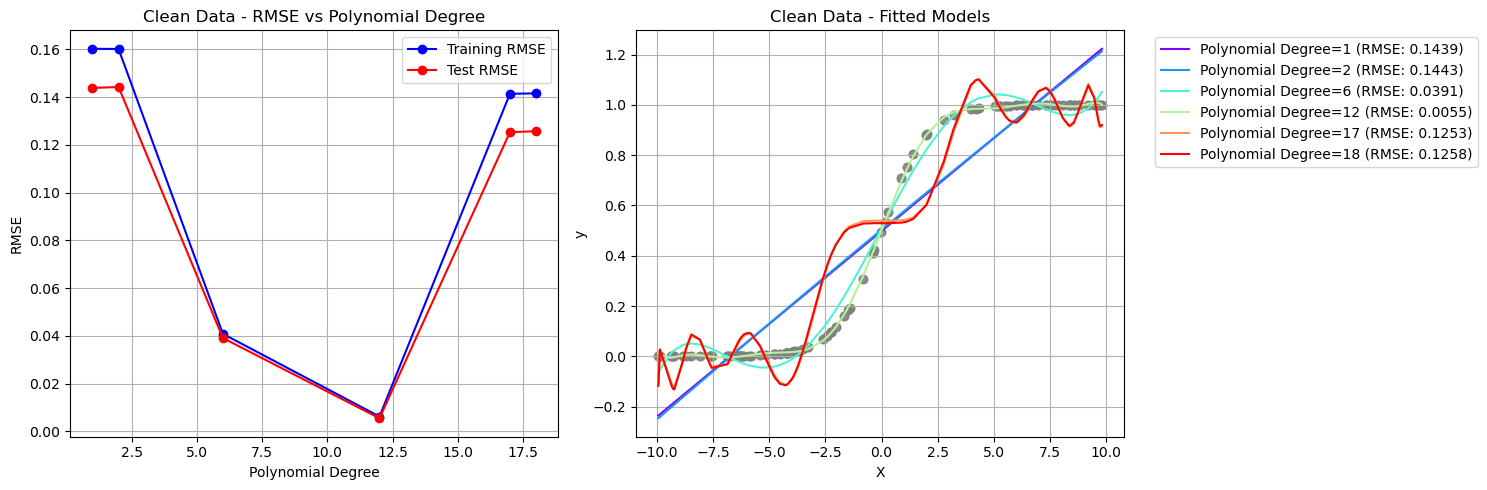

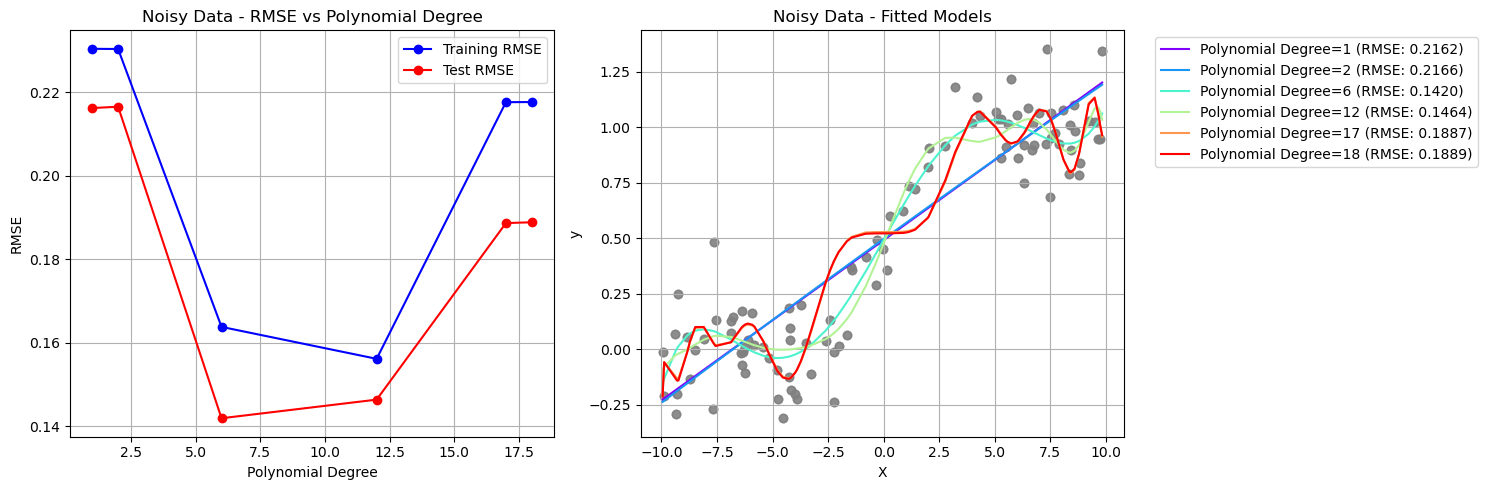

In [54]:
# create polynomial models for
clean_poly_results = create_polynomial_models(X, Y, degrees=[1, 2, 6, 12, 17, 18])
noisy_poly_results = create_polynomial_models(X, Y_noise, degrees=[1, 2, 6, 12, 17, 18])

plot_model_results(clean_poly_results, title_prefix="Clean Data")
plot_model_results(noisy_poly_results, title_prefix="Noisy Data")

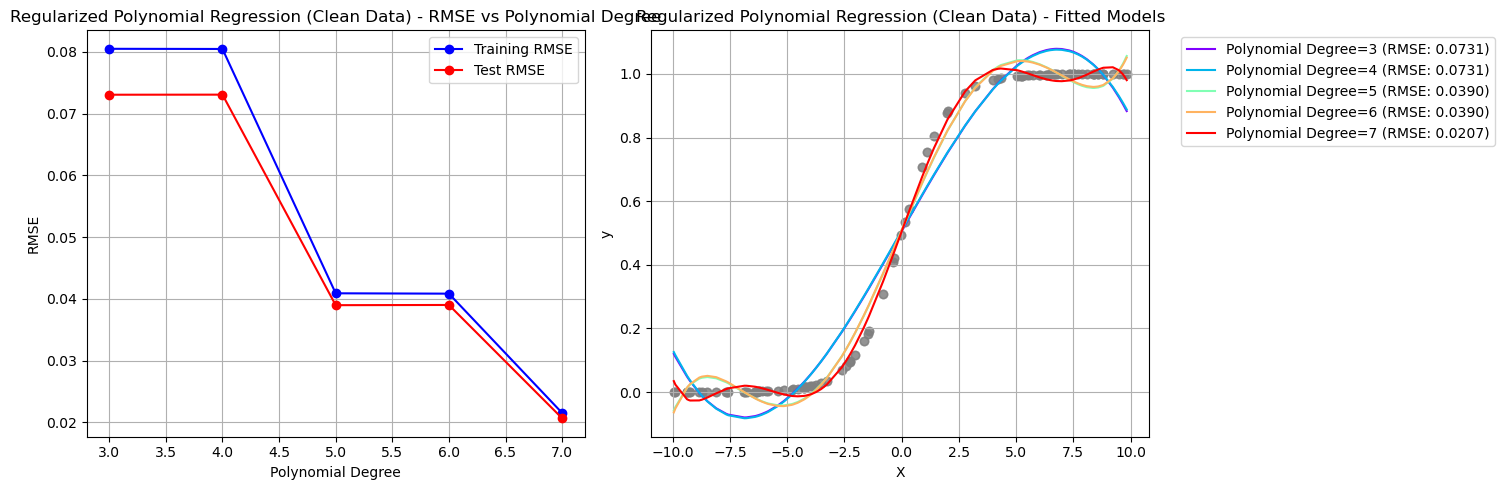

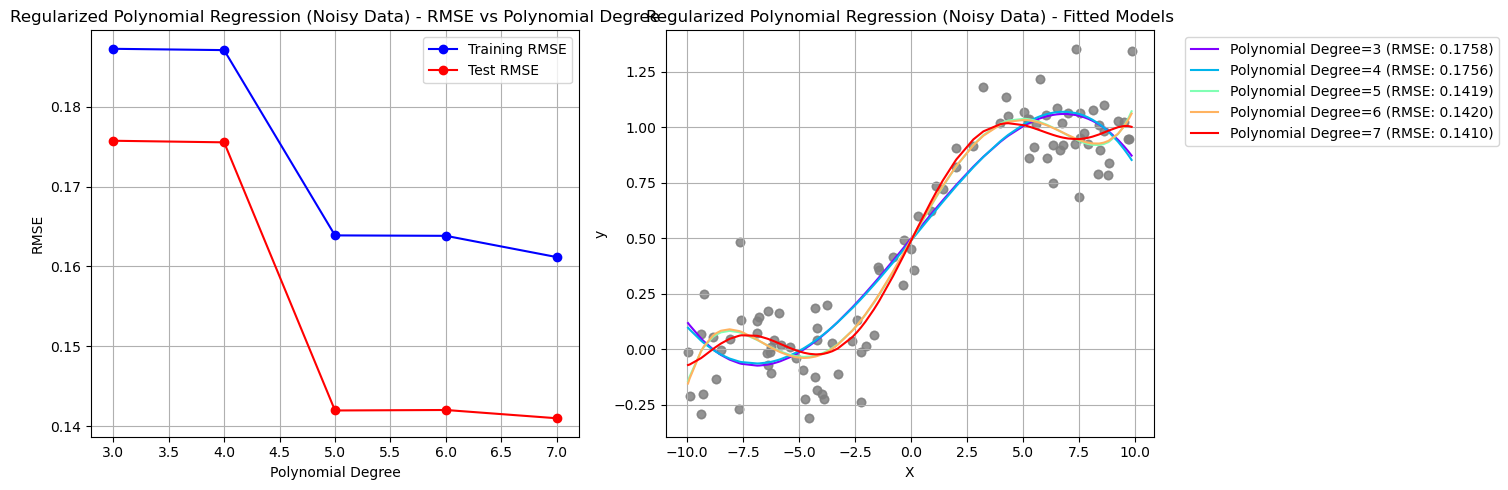

In [55]:
# Create regularized polynomial models
clean_reg_results = create_regularized_polynomial_models(X, Y)
noisy_reg_results = create_regularized_polynomial_models(X, Y_noise)

# Plot results
plot_model_results(clean_reg_results, title_prefix="Regularized Polynomial Regression (Clean Data)")
plot_model_results(noisy_reg_results, title_prefix="Regularized Polynomial Regression (Noisy Data)")

In [56]:
from sklearn.linear_model import Lasso

def create_lasso_polynomial_model(X, y, degree=20, test_size=0.2, random_state=42):
    """
    Create and evaluate a polynomial model with LASSO regularization
    """
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit model with LASSO regularization
    model = Lasso(random_state=random_state)
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Count non-zero coefficients
    n_nonzero = np.sum(model.coef_ != 0)
    
    return {
        'model': model,
        'poly': poly,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'train_pred': train_pred,
        'test_pred': test_pred,
        'coefficients': model.coef_,
        'n_nonzero': n_nonzero
    }

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.349e+00, tolerance: 8.061e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+01, tolerance: 8.863e-03
  model = cd_fast.enet_coordinate_descent(


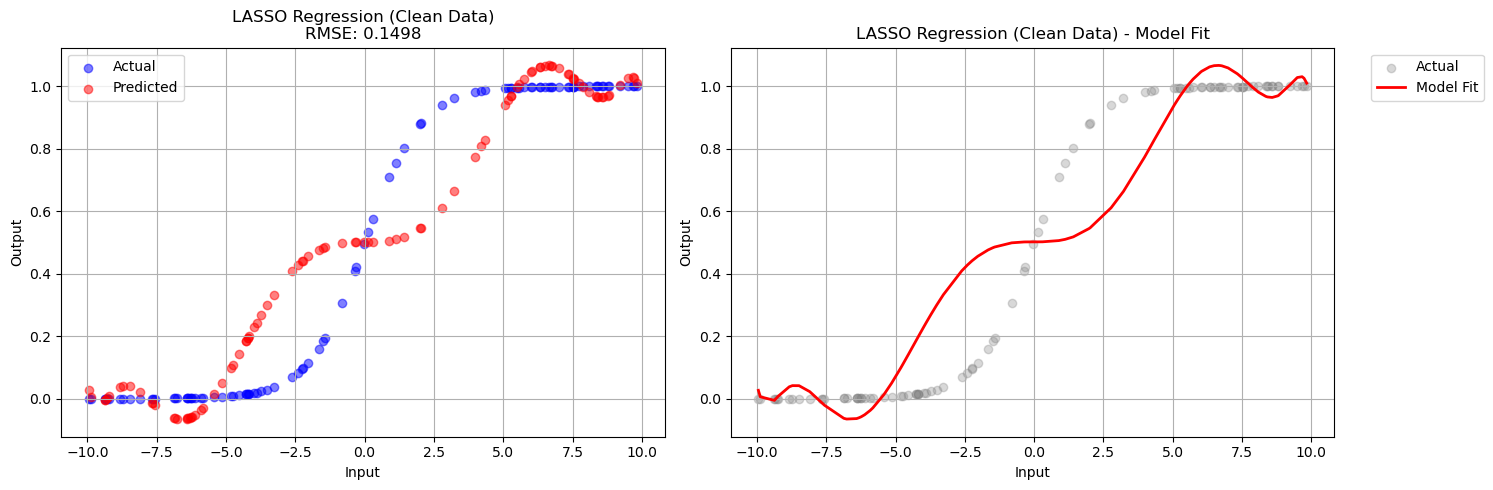

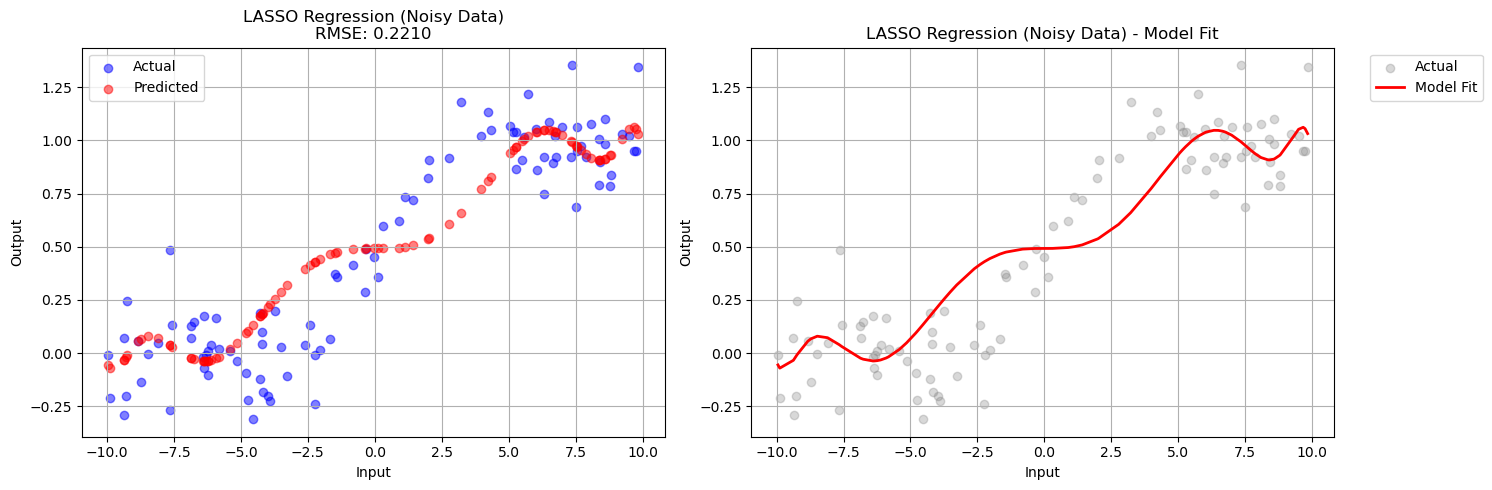

In [57]:
# Create LASSO polynomial models
clean_lasso_results = create_lasso_polynomial_model(X, Y)
noisy_lasso_results = create_lasso_polynomial_model(X, Y_noise)

# Plot results
plot_model(clean_lasso_results['X_test'], clean_lasso_results['y_test'], clean_lasso_results['test_pred'], clean_lasso_results['test_rmse'], title='LASSO Regression (Clean Data)')
plot_model(noisy_lasso_results['X_test'], noisy_lasso_results['y_test'], noisy_lasso_results['test_pred'], noisy_lasso_results['test_rmse'], title='LASSO Regression (Noisy Data)')

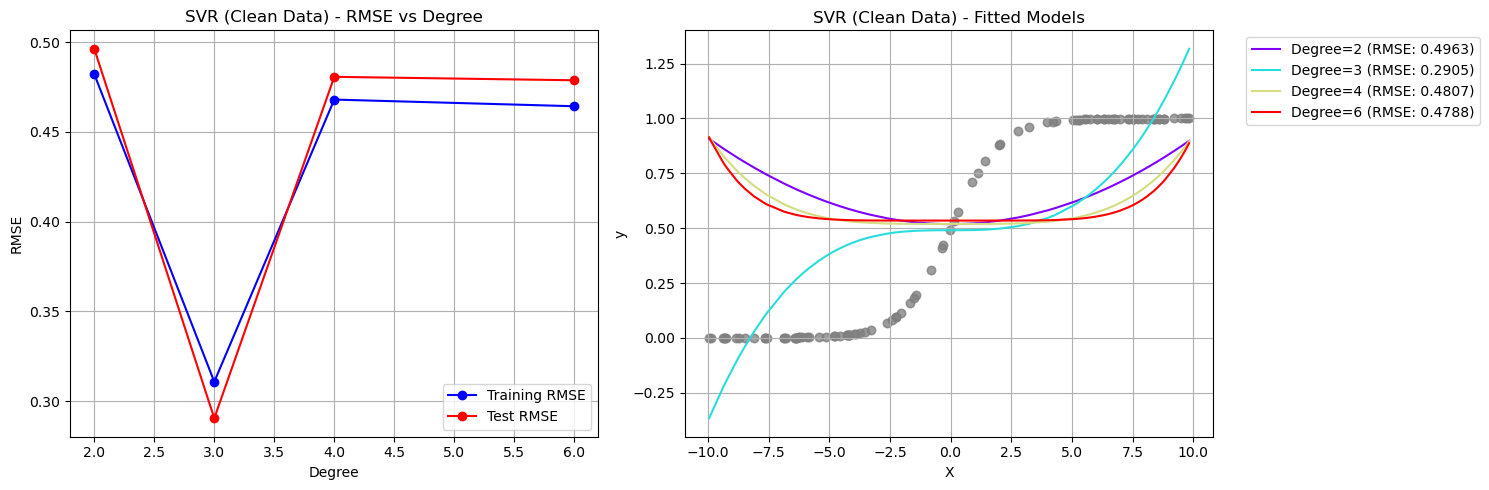

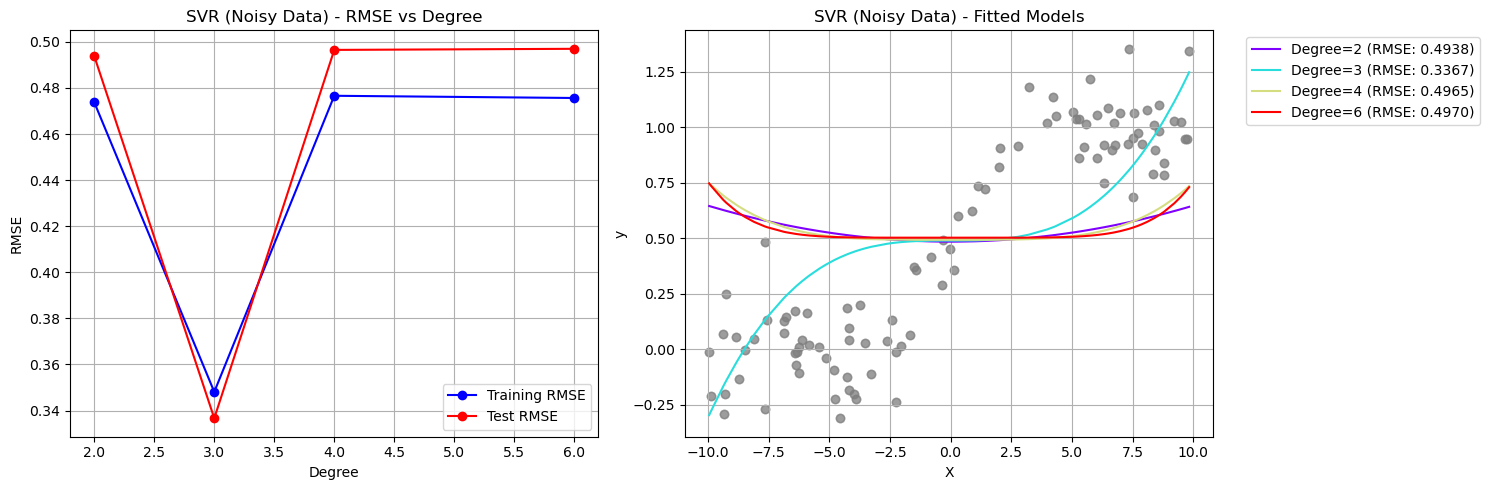

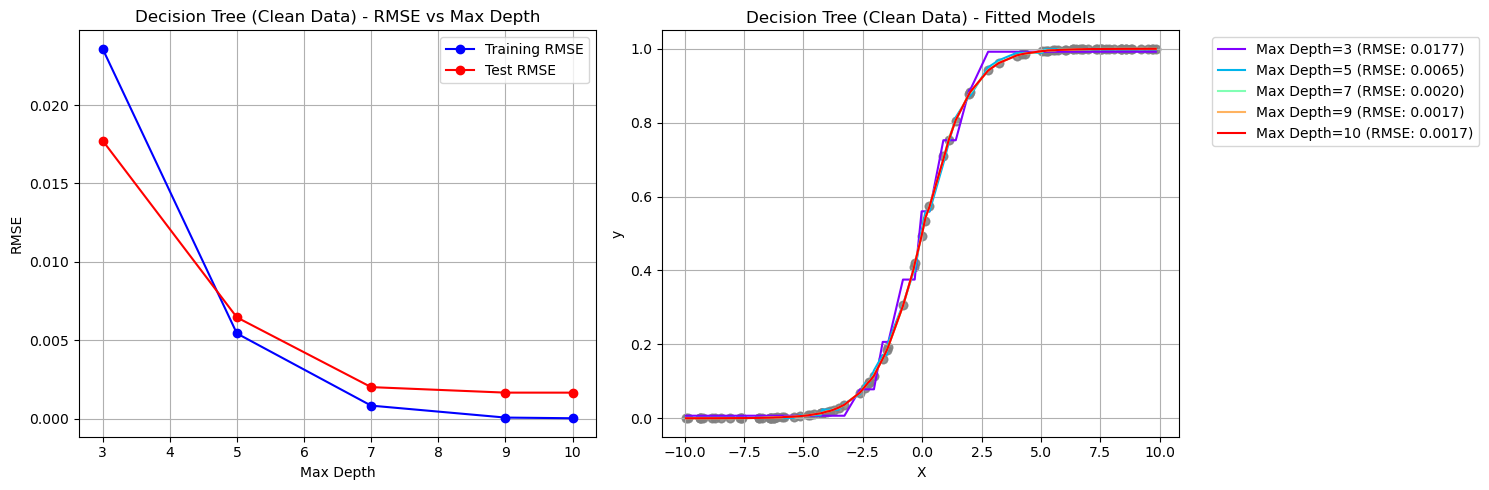

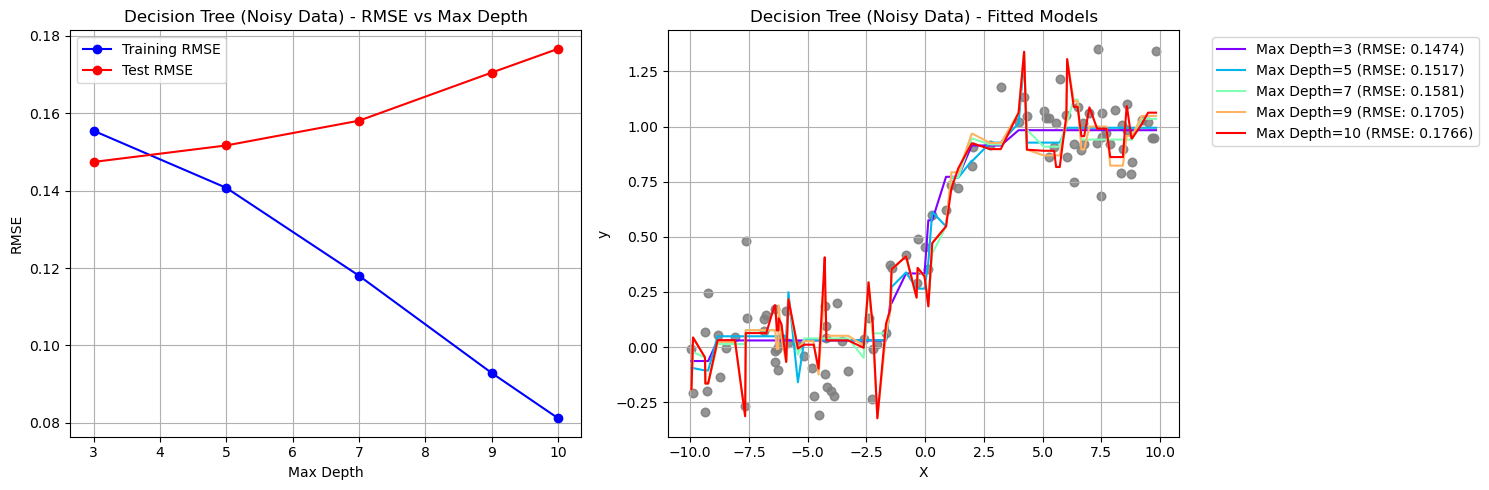

In [58]:
import numpy as np
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_svr_models(X, y, degrees=[2, 3, 4, 6], test_size=0.2, random_state=42):
    """
    Create and evaluate SVR models with polynomial kernels
    """
    results = {}
    X = X.reshape(-1, 1)  # Ensure X is 2D
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    for degree in degrees:
        # Create and fit SVR model
        model = SVR(kernel='poly', degree=degree)
        model.fit(X_train, y_train)
        
        # Make predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        results[degree] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'train_pred': train_pred,
            'test_pred': test_pred
        }
    
    return results

def create_dt_models(X, y, max_depths=[3, 5, 7, 9, 10], test_size=0.2, random_state=42):
    """
    Create and evaluate Decision Tree models with different depths
    """
    results = {}
    X = X.reshape(-1, 1)  # Ensure X is 2D
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    for depth in max_depths:
        # Create and fit Decision Tree model
        model = DecisionTreeRegressor(max_depth=depth, random_state=random_state)
        model.fit(X_train, y_train)
        
        # Make predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        results[depth] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'train_pred': train_pred,
            'test_pred': test_pred
        }
    
    return results


# Create SVR models
clean_svr_results = create_svr_models(X, Y)
noisy_svr_results = create_svr_models(X, Y_noise)

# Plot results
plot_model_results(clean_svr_results, title_prefix="SVR (Clean Data)", model_type="svr")
plot_model_results(noisy_svr_results, title_prefix="SVR (Noisy Data)", model_type="svr")


# Create Decision Tree models
clean_dt_results = create_dt_models(X, Y)
noisy_dt_results = create_dt_models(X, Y_noise)

# Plot results
plot_model_results(clean_dt_results, title_prefix="Decision Tree (Clean Data)", model_type="tree")
plot_model_results(noisy_dt_results, title_prefix="Decision Tree (Noisy Data)", model_type="tree")


In [59]:
def find_best_model(results, baseline_rmse, model_type="Model"):
    # Find configuration with lowest test RMSE
    best_config = min(results.items(), key=lambda x: x[1]['test_rmse'])
    best_param = best_config[0]
    best_rmse = best_config[1]['test_rmse']
    improvement = ((baseline_rmse - best_rmse) / baseline_rmse) * 100
    
    print(f"\n{model_type} Best Configuration:")
    print(f"Parameter value: {best_param}")
    print(f"RMSE: {best_rmse:.4f}")
    print(f"Baseline RMSE: {baseline_rmse:.4f}")
    print(f"Improvement over baseline: {improvement:.1f}%")
    
    return best_param, best_rmse

# Example usage:
# Get baseline RMSEs from degree 1 polynomial models

# Find best configurations for each model type
best_poly_clean = find_best_model(clean_poly_results, clean_rmse, "Polynomial (Clean Data)") 
best_poly_noisy = find_best_model(noisy_poly_results, noisy_rmse, "Polynomial (Noisy Data)")


Polynomial (Clean Data) Best Configuration:
Parameter value: 12
RMSE: 0.0055
Baseline RMSE: 0.1566
Improvement over baseline: 96.5%

Polynomial (Noisy Data) Best Configuration:
Parameter value: 6
RMSE: 0.1420
Baseline RMSE: 0.2249
Improvement over baseline: 36.9%


In [60]:

# Find best configurations for each model type
best_svr_clean = find_best_model(clean_svr_results, clean_rmse, "SVR (Clean Data)")
best_svr_noisy = find_best_model(noisy_svr_results, noisy_rmse, "SVR (Noisy Data)")


SVR (Clean Data) Best Configuration:
Parameter value: 3
RMSE: 0.2905
Baseline RMSE: 0.1566
Improvement over baseline: -85.5%

SVR (Noisy Data) Best Configuration:
Parameter value: 3
RMSE: 0.3367
Baseline RMSE: 0.2249
Improvement over baseline: -49.7%


In [61]:
best_dt_clean = find_best_model(clean_dt_results, clean_rmse, "Decision Tree (Clean Data)")
best_dt_noisy = find_best_model(noisy_dt_results, noisy_rmse, "Decision Tree (Noisy Data)")


Decision Tree (Clean Data) Best Configuration:
Parameter value: 10
RMSE: 0.0017
Baseline RMSE: 0.1566
Improvement over baseline: 98.9%

Decision Tree (Noisy Data) Best Configuration:
Parameter value: 3
RMSE: 0.1474
Baseline RMSE: 0.2249
Improvement over baseline: 34.5%
